# Assignment 1
## Problem 1 - System Identification


This problem deals with different universal approximators for memoryless systems. For this purpose, a training set $X_{train}$ consisting of $N_{train}=50$, and a test set consisting of $N_{test}=30$ samples are given. Both sets represent i.i.d. samples of a static nonlinearity $f(\cdot)$, corrupted by additive measurement noise $\nu$, with $\nu_i \sim \mathcal{N}(0, \sigma_\nu^2)$.

![System identification setup](../../data/figures/system-identification_small.png)
&ensp;
&ensp;
&ensp;

<center>Setup for the system identification task of Problem 1</center>


In [1]:
%reload_ext autoreload
#%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# from src.models.mls_models import MyFancyModel
# from rbf_mlp import RbfNetwork
from src.utils.plotting import init_plot_style
%pylab
%matplotlib inline  

init_plot_style()
data_dir='../../data/csv/1_1_system_identification/'

warnings.filterwarnings('ignore') # Supress warnings from polyfit

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


First, let's take a look at the training and test data.

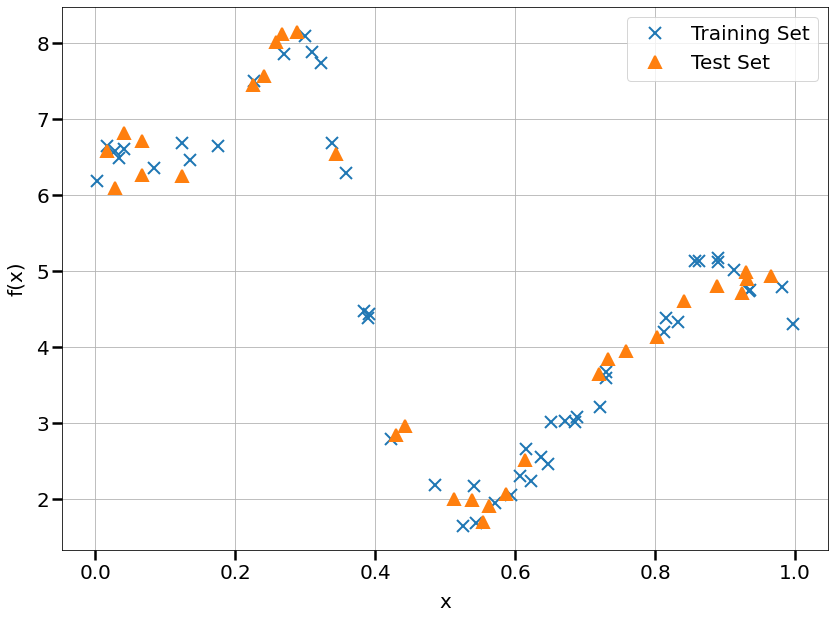

In [2]:
training_set = pd.read_csv(data_dir + 'training-set.csv').to_numpy()
x_train, y_train = training_set[:,0], training_set[:,1]

test_set = pd.read_csv(data_dir + 'test-set.csv').to_numpy()
x_test, y_test = test_set[:,0], test_set[:,1]

plt.close('all')
plt.figure()
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Run your experiments from here on!

<hr style='border:2.2px solid Black'></hr>

**Defenition of some functions for Task 1**

In [3]:
#Compute the MSE of the given coefficents p

def MSE(p,x,y):
        """Computing the 1D-MSE, given the polynomial coefficents p, the places x and the data y  """
        y_hat = np.polyval(p,x) 
        error = (y_hat-y)**2    
        mse = np.mean(error)
        return mse
    
    
# Evaluate the polynomial model
    
def PolyModelEval(order, x_fit, y_fit, x):
        """Evaluate the poly model, fited to the data [x_fit, y_fit] at x"""
        p = np.polyfit(x_fit, y_fit, order, full=False)
        y_hat = np.polyval(p,x)
        return y_hat
    
# For RBF linear least squares solution

def RbfOptimizer(P, w, x):
        """Compute the matrix A for finding the linear least squares solution based on the data x."""
        rbf_center = np.arange(0,1,1/P)
        A = np.ones([np.size(x), P])
        
        for i in range(0,np.size(x)):
            for j in range(1,P):
                A[i,j] = np.exp(1)**(-(x[i]-rbf_center[j])**2/w)
        return A
    

<hr style='border:2.2px solid Black'></hr>

**Task a)**

The training set should be used to find a polynomial model:
\begin{equation}
    \hat{f}(x) = \sum_{p=0}^P \alpha_px^p
\end{equation}
of order P ($P_{max}=25$), and with the parameters $\theta = \{\alpha_p\}_{p=1}^P$ which is optimal with respect to the mean squared error (MSE):
\begin{equation}
    J(\theta, P) = \frac{1}{N}\sum_{e=0}^{N-1}e_i^2
\end{equation}

In [4]:
#First test just with polyfit

P_max = 25
residuals_train = np.zeros(P_max-1)
residuals_test = np.zeros(P_max-1)

for order in range(1,P_max):
    
    p = np.polyfit(x_train, y_train, order, full=False)
    residuals_train[order-1] = MSE(p,x_train, y_train)
    residuals_test[order-1] = MSE(p,x_test, y_test)
    
train_min = np.where(residuals_train == np.amin(residuals_train)) #optimal order
test_min = np.where(residuals_test == np.amin(residuals_test))    #optimal order


Visual inspection of the results:

In [5]:
#Plot of MSE for train and test 

#Plotting uncommented as the figures are included in the markdown cells!

"""
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,P_max),residuals_train, label='Training Set')
plt.plot(np.arange(1,P_max), residuals_test, label='Test Set')
plt.legend()
plt.xlabel('Polynomial order P')
plt.ylabel('MSE')
plt.grid()
plt.tight_layout()
plt.show()
"""

print('Optimal polynomial order for training set: ', train_min[0]+1, 'with MSE: ', residuals_train[train_min[0]])
print('Optimal polynomial order for test set: ', test_min[0]+1, 'with MSE: ', residuals_test[test_min[0]])

#Plot the optimal model with training/test set

x_eval = np.arange(0,1,0.005)
opt_train_model = PolyModelEval(train_min[0]+1, x_train, y_train, x_eval)
opt_test_model = PolyModelEval(test_min[0]+1, x_train, y_train, x_eval)

#Plotting uncommented as the figures are included in the markdown cells!

"""
plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.plot(x_eval, opt_train_model, label='Optimal Training Model')
plt.plot(x_eval, opt_test_model, label='Optimal Test Model')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
"""


Optimal polynomial order for training set:  [23] with MSE:  [0.02241836]
Optimal polynomial order for test set:  [20] with MSE:  [0.04568998]


"\nplt.figure(figsize=(10,6))\nplt.plot(x_train, y_train, 'x', label='Training Set')\nplt.plot(x_test, y_test, '^', label='Test Set')\nplt.plot(x_eval, opt_train_model, label='Optimal Training Model')\nplt.plot(x_eval, opt_test_model, label='Optimal Test Model')\nplt.xlabel('x')\nplt.ylabel('f(x)')\nplt.legend()\nplt.grid()\nplt.tight_layout()\nplt.show()\n"

Comparing the training and test MSE cutves shows a quite similar behavior for both sets. The MSE starts with an rapid decrease up to $P=7$, and decreases further, but now much slower with increasing polynomial order. The difference betwen the MSE for the training-, and test-set is minimal, which indicates that the model generalizes well. 

![System identification setup](../../data/figures/p1_a_mse_curve.png)
&ensp;
&ensp;
&ensp;
<center> <em> Figure 1. MSE for the training-, and test-set</em></center>
&ensp;
&ensp;
&ensp;


Further analyzing the curve shows that the optimal training order $P_{opt, train} = 23$, with an MSE of $0.0224$. The lowest MSE on the test set is archived with $P_{opt, test} = 20$, where a MSE of $0.0457$ was reached. 

![System identification setup](../../data/figures/p1_a_model_comp.png)
&ensp;
&ensp;
&ensp;
<center> <em> Figure 2. Optimal training-, and test-model</em></center>
&ensp;
&ensp;
&ensp;

Figure 2 shows a comparision of the optimal traing-, and test models over the training and test samples. Both curves fit the data very well. Nevertheless, overfitting can be observed for the training model in the region of $x \in [0.95 ~1]$, which suggests that the model would generalize not as good as the test model. Therefore, the test model with $P_{opt, test} = 20$ should be used to predict new samples wiich are not contained in the trining-, or test-set.
 

<hr style='border:2.2px solid Black'></hr>

**Task b)** Use a subset of the original training set as validation set. Training and validation set must be disjoint.

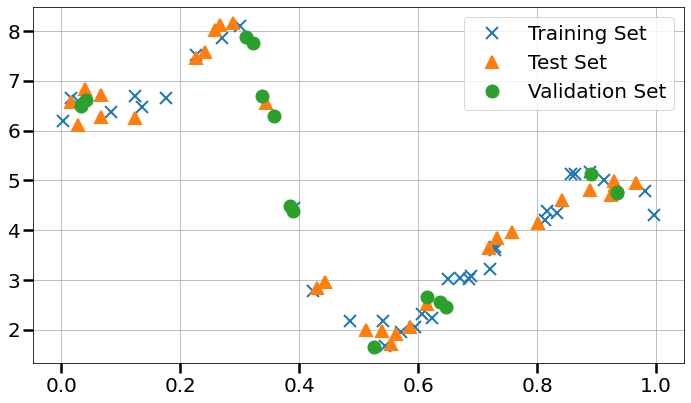

In [6]:
TV_ratio = 0.3 #Define splitting ratio btw. training and validation set, in [0,1]

N_sample = np.size(x_train)
Val_size = np.ceil(N_sample*TV_ratio)

rng = np.random.default_rng(7) #seed value set for demonstrative purposes!!
pos = rng.choice(N_sample,Val_size.astype(int), replace=False) #Draw non-repetitive random numbers

x_validation = x_train[pos]
y_validation = y_train[pos]

x_train2 = np.delete(x_train, pos)
y_train2 = np.delete(y_train, pos)

# Plot the splitted data-set
plt.figure(figsize=(10,6))
plt.plot(x_train2, y_train2, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.plot(x_validation, y_validation, 'o', label='Validation Set')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Evaluation based on validation set performance:

In [7]:
P_max = 30

residuals_validation = np.zeros(P_max-1)
residuals_train = np.zeros(P_max-1)
residuals_test = np.zeros(P_max-1)

for order in range(1,P_max):
    
    p = np.polyfit(x_train2, y_train2, order, full=False)
    residuals_train[order-1] = MSE(p,x_train2, y_train2)
    residuals_validation[order-1] = MSE(p,x_validation, y_validation)
    residuals_test[order-1] = MSE(p,x_test, y_test)
    
validation_min = np.where(residuals_validation == np.amin(residuals_validation)) #optimal order
test_min = np.where(residuals_test == np.amin(residuals_test))

print('Optimal polynomial order for validation set: ', validation_min[0]+1, 'with MSE: ', residuals_validation[validation_min[0]])
print('Optimal polynomial order for test set: ', test_min[0]+1, 'with MSE: ', residuals_test[test_min[0]])

Optimal polynomial order for validation set:  [21] with MSE:  [0.03892393]
Optimal polynomial order for test set:  [21] with MSE:  [0.05241151]


Visual inspection of the results:

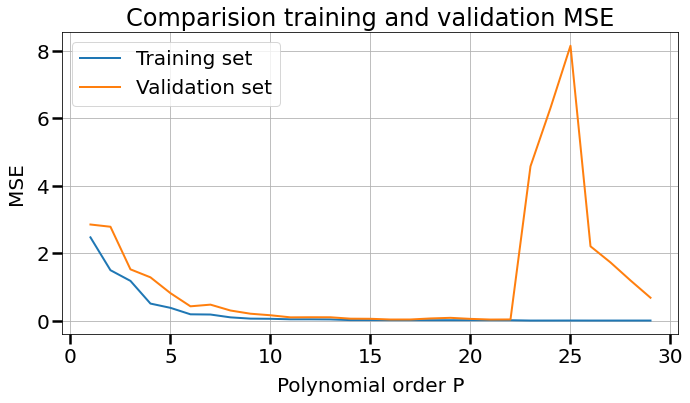

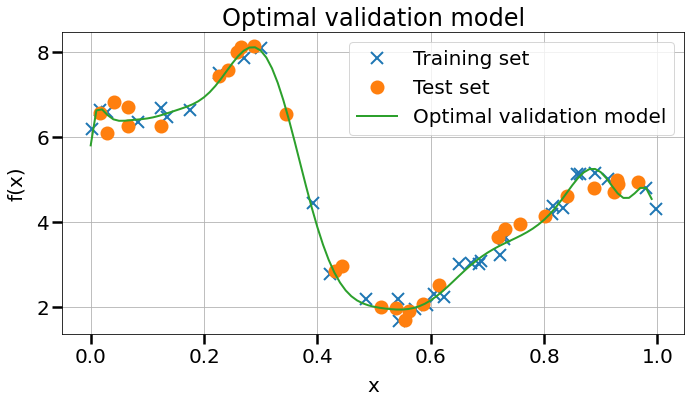

In [8]:
#Plot the training and validation MSE curve

plt.close('all')
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,P_max),residuals_train, label='Training set')
plt.plot(np.arange(1,P_max), residuals_validation, label='Validation set')
plt.xlabel('Polynomial order P')
plt.ylabel('MSE')
plt.title('Comparision training and validation MSE')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

#Plot of the optimal model based on test set

x_eval = np.arange(0,1,0.01)
y_opt_model = PolyModelEval(validation_min[0]+1, x_train2, y_train2, x_eval)

plt.figure(figsize=(10,6))
plt.plot(x_train2, y_train2, 'x', label='Training set')
plt.plot(x_test, y_test, 'o', label='Test set')
plt.plot(x_eval, y_opt_model, label='Optimal validation model')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimal validation model')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

&ensp;
<hr style='border:2.2px solid Black'></hr>

**Task c)** Use a Gaussian radial basis ($RBF$) function model $\hat{f}$

$\hat{f}(x) = \alpha_0 + \sum_{p=1}^{P} \alpha_p e^{\frac{-(x-c_p)^2}{2\omega_p^2}}$

To avoid the nonlinearity, the centers of the P $RBF$ are choosen evenly spaced on the support of the given data.

The coefficent vector $c_{opt}$ is determined by means of minimizing the MSE for thge given model oder P $^{1}$:

$
c_{opt} = (A^TA)^{-1} \cdot A^T y_{train}
$

Where $A$ is defined as:
&ensp;

$
A = \begin{bmatrix}
1 & e^{\frac{-(x[0]-c_1)^2}{2\omega^2}} & e^{\frac{-(x[1]-c_1)^2}{2\omega^2}} & \dots & e^{\frac{-(x[N]-c_1)^2}{2\omega^2}}\\
1 & e^{\frac{-(x[0]-c_2)^2}{2\omega^2}} & e^{\frac{-(x[1]-c_2)^2}{2\omega^2}} & \dots & e^{\frac{-(x[N]-c_2)^2}{2\omega^2}}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & e^{\frac{-(x[0]-c_P)^2}{2\omega^2}} & e^{\frac{-(x[1]-c_P)^2}{2\omega^2}} & \dots &  e^{\frac{-(x[N]-c_P)^2}{2\omega^2}}
\end{bmatrix}
$

&ensp;
&ensp;
&ensp;
$^1$ Using the so called pseudoinverse, or  of A
&ensp;
&ensp;

MSE on test set:  0.04439075617460967


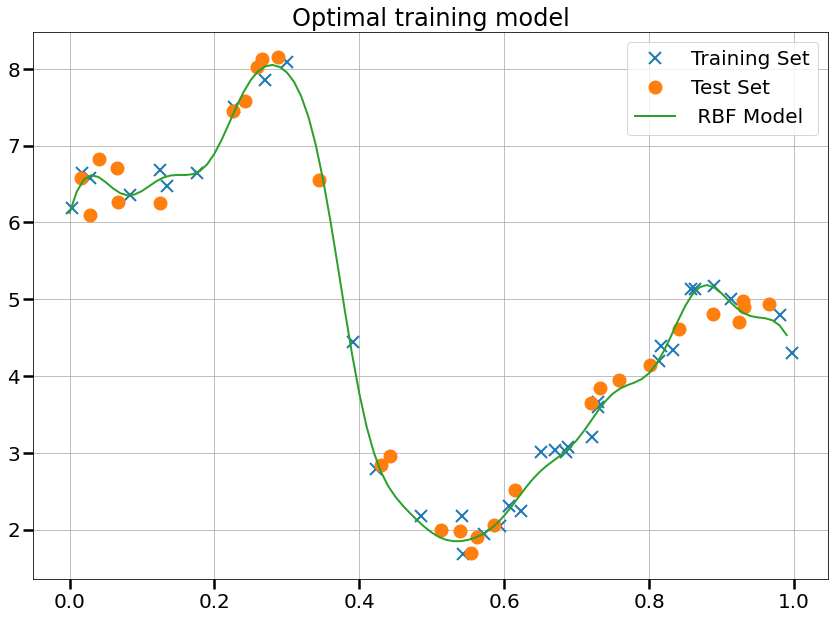

In [9]:
P = 20 #number of RBF's

rbf_center = np.arange(0,1,1/P)
w2 = (2/P)**2 #width parameter sqared

A = RbfOptimizer(P, w2, x_train)     
c_opt = np.linalg.pinv(A).dot(y_train)

#Evaluate the model with test set

y_hat = RbfOptimizer(P, w2, x_test).dot(c_opt)  #for MSE compuation
mse = np.mean((y_hat-y_test)**2)  

print('MSE on test set: ', mse)

x_eval = np.arange(0,1,0.01)
y_eval = RbfOptimizer(P, w2, x_eval).dot(c_opt) #for plot

#Plot the model for the selected model order P

plt.figure()
plt.plot(x_train2, y_train2, 'x', label = 'Training Set')
plt.plot(x_test, y_test, 'o', label='Test Set')
plt.plot(x_eval, y_eval, label = ' RBF Model')
plt.title('Optimal training model')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Optimal RBF order for test set:  [20] with MSE:  [[0.04439076]]


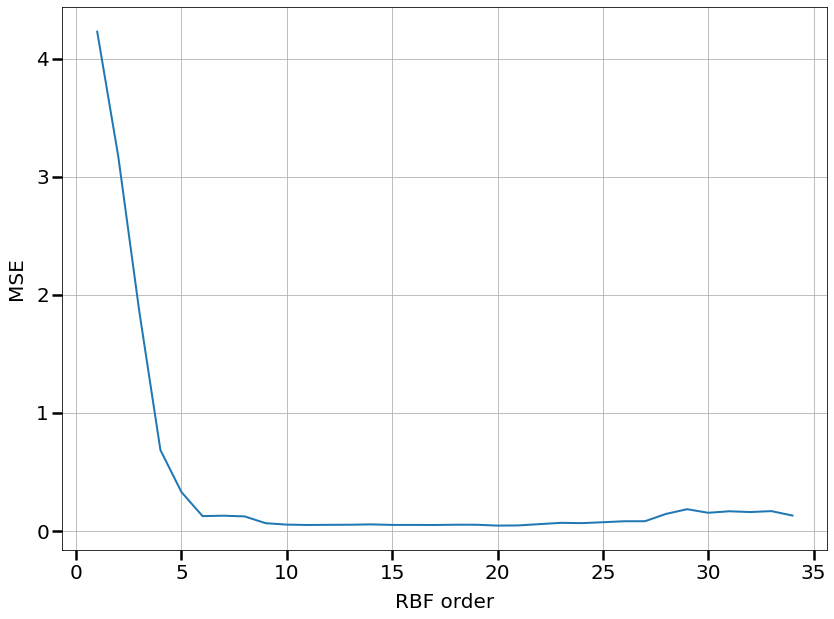

In [10]:
#Just some code to find the optimal model order P, not asked!
P = 35 #number of RBF's

mse = np.zeros([P-1,1])

for order in range(1,P):
    
    w2 = (2/order)**2                    #width parameter sqared
    rbf_center = np.arange(0,1,1/order)  #RBF centers
    
    A = RbfOptimizer(order, w2, x_train)     
    c_opt = np.linalg.pinv(A).dot(y_train)
    
    y_hat = RbfOptimizer(order, w2, x_test).dot(c_opt)
    mse[order-1] = np.mean((y_hat-y_test)**2)  
    
mse_min = np.where(mse == np.amin(mse)) #optimal order
print('Optimal RBF order for test set: ', mse_min[0]+1, 'with MSE: ', mse[mse_min[0]])

plt.figure() #figsize=(8,5)
plt.plot(np.arange(1,P,1), mse)
plt.xlabel('RBF order')
plt.ylabel('MSE')
plt.grid()
plt.tight_layout()


&ensp;

<hr style='border:2.2px solid Black'></hr>

**Task d)** Learn the optimal centers and widths using gradient descent (GD) applyed on a RBF-NN. 

Epoch 0 training loss is 6.70
Epoch 50 training loss is 0.66
Epoch 100 training loss is 0.07
Epoch 150 training loss is 0.05
Epoch 200 training loss is 0.04
Epoch 250 training loss is 0.07


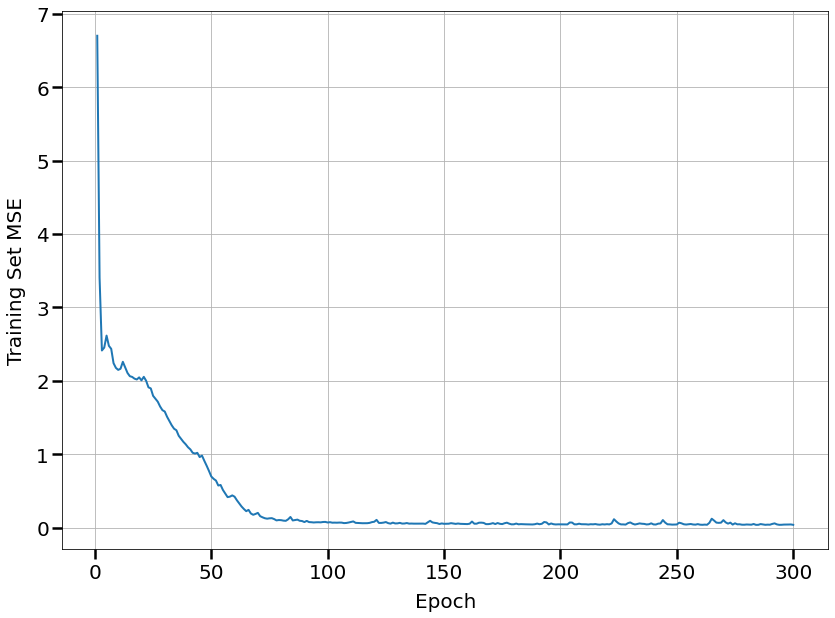

In [23]:
from src.models.rbf_mlp import RbfMLP

rbf_mlp_model = RbfMLP(hidden_size = 30)
loss_list = rbf_mlp_model.fit(x_train, y_train, learning_rate=4e-2)

plt.figure()
plt.plot(list(range(1, 1 + len(loss_list))), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Training Set MSE')
plt.grid()
plt.tight_layout()

Training MSE is 0.0379
Test MSE is 0.0357


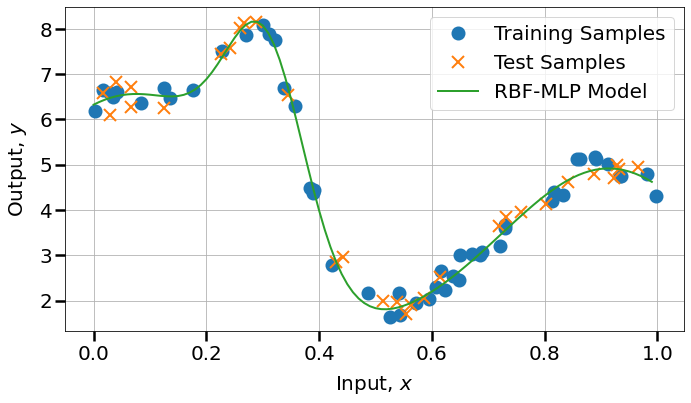

In [25]:
x_eval = np.arange(0,1,0.01)

approx_output = rbf_mlp_model.predict(x_eval)
y_pred = rbf_mlp_model.predict(x_test)

print(f'Training MSE is {loss_list[-1]:.4f}')
print(f'Test MSE is {np.mean((y_test-np.transpose(y_pred))**2):.4f}')

plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, 'o', label='Training Samples')
plt.plot(x_test, y_test, 'x', label='Test Samples')
plt.plot(x_eval, approx_output, label='RBF-MLP Model')
#plt.plot(x_eval, y_eval, label = 'Static RBF Model')
plt.xlabel('Input, $x$')
plt.ylabel('Output, $y$')
plt.legend()
plt.grid()
plt.tight_layout()

![System identification setup](../../data/figures/p1_d_low_training_test_mse.png)
&ensp;
&ensp;
&ensp;
<center> <em> Figure X. Model with low training and test MSE</em></center>
&ensp;
&ensp;
&ensp;

Figure X shows one of our best models, with a $MSE_{train} = 0.038$ and $MSE_{test} = 0.36$. The model was found using the single layer MLP with gaussian activation functions. It was trained over 300 ebochs with an learning rate of $4\cdot10^{-2}$ and outperforms all polynomial models on the test set. Interestingly, the MSE is even lower on the test-, than on the training set, which indicates a good model and suggest very good generaloization.

&ensp;

<hr style='border:2.2px solid Black'></hr>

**Task e)** Approximation using a feed-foward neuronal network. 

In [13]:
from src.models.variable_rbf_mlp import VarRbfMLP

h_list = [200,200,200,200,200] #creates a 4 layer MLP with 200 neurons per layer

rbf_mlp_model = VarRbfMLP(h_sizes = h_list)
loss_list = rbf_mlp_model.fit(x_train, y_train, batch_size=15
                              , learning_rate=8e-2, max_epochs=1000)

x_eval = np.arange(0,1,0.01)

approx_output = rbf_mlp_model.predict(x_eval)
y_pred = rbf_mlp_model.predict(x_test)


Epoch 0 training loss is 117.65
Epoch 50 training loss is 4.89
Epoch 100 training loss is 5.19
Epoch 150 training loss is 5.557
Epoch 200 training loss is 4.702
Epoch 250 training loss is 3.557
Epoch 300 training loss is 3.797
Epoch 350 training loss is 4.238
Epoch 400 training loss is 3.610
Epoch 450 training loss is 5.437
Epoch 500 training loss is 4.427
Epoch 550 training loss is 3.606
Epoch 600 training loss is 3.603
Epoch 650 training loss is 6.576
Epoch 700 training loss is 7.461
Epoch 750 training loss is 23.50
Epoch 800 training loss is 3.557
Epoch 850 training loss is 7.091
Epoch 900 training loss is 4.518
Epoch 950 training loss is 9.436


A very good combination is a four layer network with 200 neurons per layer and asigmoidal activation function. The other params where: learning rate 5e-3, 500 epochs and batch size 15. 

The archivable MSE with this model where around 0.03 on the training set, and 0.0374 on the test set. 


Training MSE is 3.6707
Test MSE is 4.1440


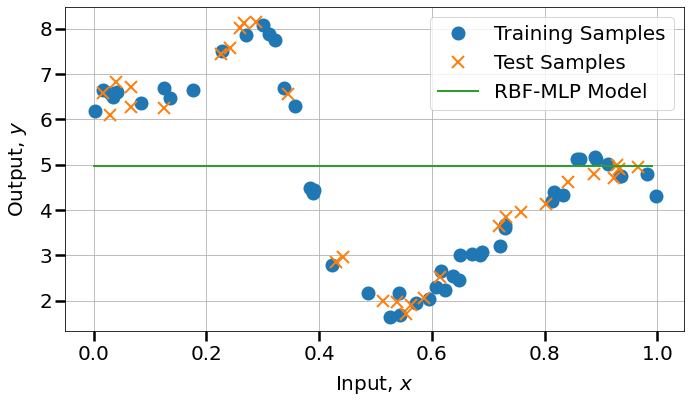

In [14]:
print('')
print(f'Training MSE is {loss_list[-1]:.4f}')
print(f'Test MSE is {np.mean((y_test-np.transpose(y_pred))**2):.4f}')

plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, 'o', label='Training Samples')
plt.plot(x_test, y_test, 'x', label='Test Samples')
plt.plot(x_eval, approx_output, label='RBF-MLP Model')
#plt.plot(x_eval, y_eval, label = 'Static RBF Model')
plt.xlabel('Input, $x$')
plt.ylabel('Output, $y$')
plt.legend()
plt.grid()
plt.tight_layout()


![System identification setup](../../data/figures/P1_e_overfitting_sigmoidal_network.png)
&ensp;
&ensp;
&ensp;
<center> <em> Figure X. Overfitting on the training data with multi-layer network</em></center>
&ensp;
&ensp;
&ensp;

Figure X shows an example of overfitting, which was archived by using a 5-layer networks, with 200 neurons per layer and a sigmoidal activation function. The networks was trained for $1000$ epochs, and shows destinct steps in the final model, which indicate beginning overfittiing on the training data. 